In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [26]:
df=pd.read_csv('fcc-forum-pageviews.csv',parse_dates=True, index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [27]:
df=df[(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]

In [28]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


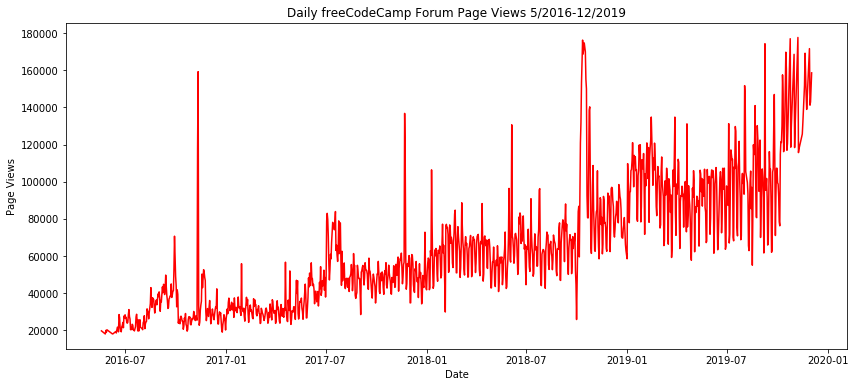

In [29]:
def draw_line_plot():
    fig,ax = plt.subplots(figsize=(14,6))
    ax.plot(df, color="red")
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    fig.savefig('LinePlot.png')

draw_line_plot()
    

In [30]:
df_bar=df.copy()
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [31]:
df_bar['Year']=df_bar.index.year
df_bar['Month']=df_bar.index.month
df_bar['Month'] = pd.to_datetime(df_bar['Month'], format='%m').dt.month_name()
df_bar

,value,Year,Month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [32]:
pd.DataFrame(df_bar.groupby(['Year','Month'])['value'].mean())

value
Year Month                   
2016 August      31049.193548
     December    27832.419355
     July        24109.678571
     June        21875.105263
     May         19432.400000
     November    40448.633333
     October     27398.322581
     September   41476.866667
2017 April       30878.733333
     August      47712.451613
     December    48420.580645
     February    31113.071429
     January     32785.161290
     July        65806.838710
     June        43577.500000
     March       29369.096774
     May         34244.290323
     November    57701.566667
     October     47438.709677
     September   47376.800000
2018 April       62350.833333
     August      62831.612903
     December    80047.483871
     February    65679.000000
     January     58580.096774
     July        63591.064516
     June        70117.000000
     March       62693.774194
     May         56562.870968
     November    78688.333333
     October    111378.142857
     September   65941.733333
2019 April       89368.433333
     August     102717.310345
     December   150733.500000
     February   105968.357143
     January    102056.516129
     July        97236.566667
     June        90435.642857
     March       91214.483871
     May         91439.903226
     November   143166.428571
     October    122802.272727
     September   97268.833333

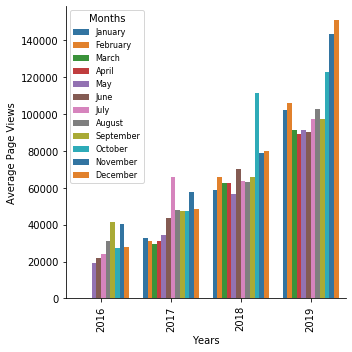

In [43]:
month=['January','February','March','April','May','June','July','August','September','October','November','December']
bar=sns.catplot(data=df_bar,x='Year',y='value',kind='bar',hue='Month',ci=None,palette="tab10", legend=False, hue_order=month)
fig=bar.fig
ax=bar.ax

ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(loc='upper left', title='Months', fontsize=8)
plt.xticks(rotation=90)
plt.tight_layout()


fig.savefig('Bargraph.png')

In [34]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [35]:
df_box.sort_values(by=['year','date'], ascending=[False, True], inplace=True)
df_box

,date,value,year,month
932,2019-01-01,58508,2019,Jan
933,2019-01-02,109708,2019,Jan
934,2019-01-03,100710,2019,Jan
935,2019-01-04,94514,2019,Jan
936,2019-01-05,77897,2019,Jan
...,...,...,...,...
200,2016-12-27,25138,2016,Dec
201,2016-12-28,28424,2016,Dec
202,2016-12-29,27197,2016,Dec
203,2016-12-30,24804,2016,Dec


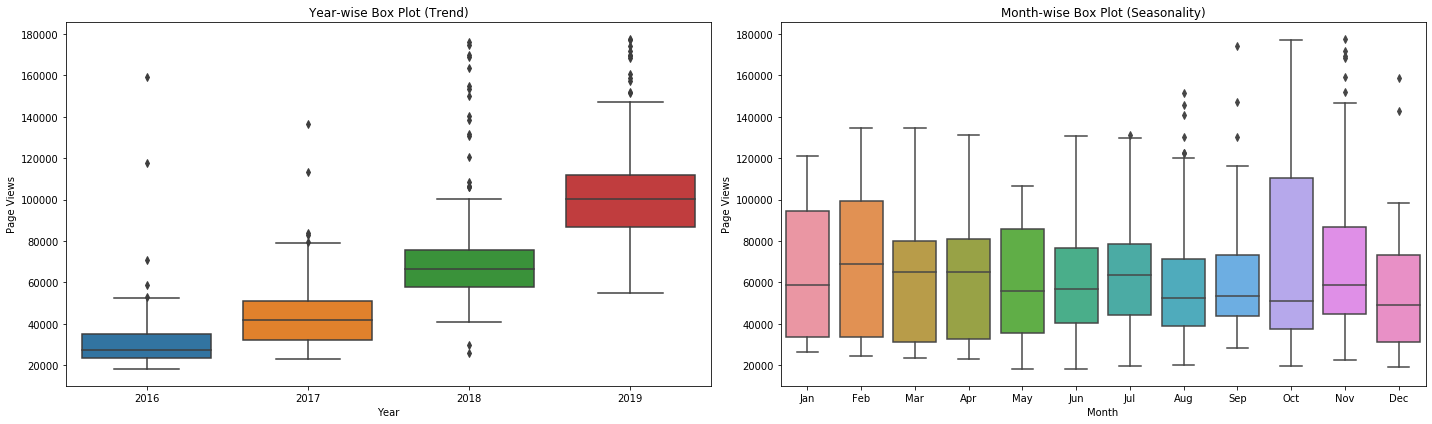

In [45]:
fig, ax=plt.subplots(1,2 , figsize=(20,6))
sns.boxplot(data=df_box, y="value", x="year",ax=ax[0])
sns.boxplot(data=df_box, y="value", x="month",ax=ax[1])


ax[0].set_ylabel('Page Views')
ax[1].set_ylabel('Page Views')
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Month')
ax[0].set_title('Year-wise Box Plot (Trend)')
ax[1].set_title('Month-wise Box Plot (Seasonality)')
plt.tight_layout()


In [47]:
fig.savefig('Boxplot.png')